# Extracting geodesics from the heat kernel

This notebook is a numerical illustration of *Varadhan's formula*, which relates Riemannian geodesics and eikonal equations, with the heat kernel.

We also present a variant of this method, devoted to Rander metrics, which are asymmetric perturbations of Riemannian metrics featuring a drift term.

**Reference**

The numerical scheme used for anisotropic diffusion in this notebook is taken from:
* Fehrenbach, J., & Mirebeau, J.-M. (2014). Sparse non-negative stencils for anisotropic diffusion. Journal of Mathematical Imaging and Vision, 49(1), 123–147. http://doi.org/http://dx.doi.org/10.1007/s10851-013-0446-3

The Varadhan formula was first numerically illustrated in:
* Crane, K., Weischedel, C., & Wardetzky, M. (2013). Geodesics in heat: A new approach to computing distance based on heat flow. ACM Transactions on Graphics (TOG), 32(5), 152.

## 0. Importing the required libraries

In [3]:
import sys; sys.path.append("..") # Allow import from parent directory
from NumericalSchemes import LinearParallel as lp
from NumericalSchemes import LinearPDE

In [4]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt

## 1. Anisotropic diffusion and Riemannian distances

Let $\Omega \subset R^d$ be a domain, and let $D : \Omega \to S_d^{++}$ be a field of diffusion tensors. 
Consider the elliptic optimization problem 
$$
    \min \int_\Omega \epsilon^2 | \nabla u(x)|^2_{D(x)} + u(x)^2\, dx
$$
subject to Dirichlet boundary conditions on a part $\Gamma_D \subset \partial \Omega$ of the domain boundary 
$$
    u=1 \text{ on } \Gamma_D,
$$
and (implicit) Neuman boundary conditions on $\partial\Omega \setminus \Gamma_D$. Denote by $u_\epsilon$ the minimizer.

Under adequate assumptions, one can show that 
$$
    v_\epsilon := -\epsilon \ln u_\epsilon
$$
converges as $\epsilon \to 0^+$ to the distance function from $\Gamma_D$ on $\Omega$, measured with respect to the metric $M(x) := D(x)^{-1}$ that is inverse to the diffusion tensors. 
A justification for this fact is that the PDE
$$
    |\nabla v(x)|_{D(x)}^2 - \epsilon {\rm div}( D(x) \nabla v(x)) = 1
$$
is satisfied on $\Omega$, along with the dirichlet boundary condition $v=0$ on $\Gamma_D$.
As $\epsilon \to 0$, the viscosity introduced by the second order operator vanishes, and one recovers the Riemannian eikonal equation.

In [3]:
dim=2
bounds = (10,10)

diff = np.zeros((dim,dim,)+bounds)
diff[0,0]=1
diff[1,1]=1

In [4]:
(row,col,data) = LinearPDE.OperatorMatrix(diff)
lap = sp.coo_matrix((data,(row,col)))

In [23]:
rhs = np.zeros(bounds)
rhs[8,5]=1
rhs -= rhs.sum()/rhs.size

In [24]:
sol = spsolve(lap.tocsr(),rhs.flatten()).reshape(bounds)

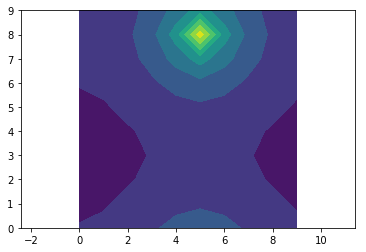

In [25]:
plt.axis('equal')
plt.contourf(sol)

In [6]:
np.array([["a","b"],["bc","d"]]).shape

(2, 2)

In [7]:
np.full((2,3),'Neumann')

array([['Neumann', 'Neumann', 'Neumann'],
       ['Neumann', 'Neumann', 'Neumann']], dtype='<U7')

In [8]:
(2,3)+(4,)

(2, 3, 4)

In [10]:
a=-4
a%=3
a

2

In [13]:
np.logical_not(np.full((2,2),False))

array([[ True,  True],
       [ True,  True]])